In [35]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [36]:
df=pd.read_csv('transaction_sep_oct_nov_dec.csv')

In [37]:
df.head()

,time,total
0,01-09-2021,1653794
1,02-09-2021,2373894
2,03-09-2021,2415128
3,04-09-2021,2299748
4,05-09-2021,177030


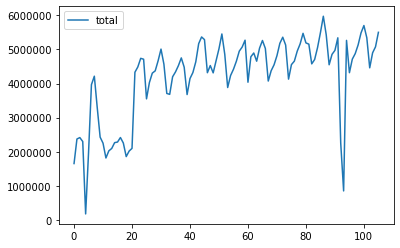

In [38]:
df.plot()
plt.ticklabel_format(style='plain', axis='y')

In [39]:
df.columns = ['ds','y']
df.head()

,ds,y
0,01-09-2021,1653794
1,02-09-2021,2373894
2,03-09-2021,2415128
3,04-09-2021,2299748
4,05-09-2021,177030


In [40]:
df['ds'] = pd.to_datetime(df['ds'])

In [41]:
df.head()

,ds,y
0,2021-01-09,1653794
1,2021-02-09,2373894
2,2021-03-09,2415128
3,2021-04-09,2299748
4,2021-05-09,177030


In [42]:
from fbprophet import Prophet

In [43]:
# Initialize the Model
model=Prophet()

In [44]:
df.columns

Index(['ds', 'y'], dtype='object')

In [45]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [47]:
df.tail()

,ds,y
101,2021-11-12,5341703
102,2021-12-12,4460781
103,2021-12-13,4900803
104,2021-12-14,5076569
105,2021-12-15,5501964


In [48]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=1)

In [49]:
future_dates.tail()

,ds
102,2021-12-12
103,2021-12-13
104,2021-12-14
105,2021-12-15
106,2021-12-16


In [50]:
future_dates.head()

,ds
0,2021-01-09
1,2021-01-10
2,2021-01-11
3,2021-01-12
4,2021-02-09


In [51]:
prediction=model.predict(future_dates)

In [52]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-09,3.037834e+06,1.705539e+06,4.648081e+06,3.037834e+06,3.037834e+06,96033.573818,96033.573818,96033.573818,96033.573818,96033.573818,96033.573818,0.0,0.0,0.0,3.133867e+06
1,2021-01-10,3.043070e+06,1.267934e+06,4.267074e+06,3.043070e+06,3.043070e+06,-273572.094101,-273572.094101,-273572.094101,-273572.094101,-273572.094101,-273572.094101,0.0,0.0,0.0,2.769498e+06
2,2021-01-11,3.048306e+06,1.612515e+06,4.559667e+06,3.048306e+06,3.048306e+06,48890.178975,48890.178975,48890.178975,48890.178975,48890.178975,48890.178975,0.0,0.0,0.0,3.097196e+06
3,2021-01-12,3.053543e+06,1.502296e+06,4.400629e+06,3.053543e+06,3.053543e+06,-129385.524811,-129385.524811,-129385.524811,-129385.524811,-129385.524811,-129385.524811,0.0,0.0,0.0,2.924157e+06
4,2021-02-09,3.192570e+06,1.609225e+06,4.575306e+06,3.192570e+06,3.192570e+06,-129385.524810,-129385.524810,-129385.524810,-129385.524810,-129385.524810,-129385.524810,0.0,0.0,0.0,3.063185e+06


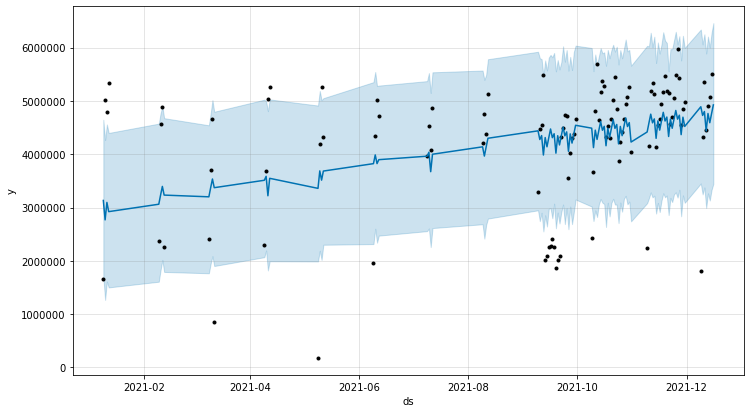

In [53]:
### plot the predicted projection
model.plot(prediction)
plt.ticklabel_format(style='plain', axis='y')

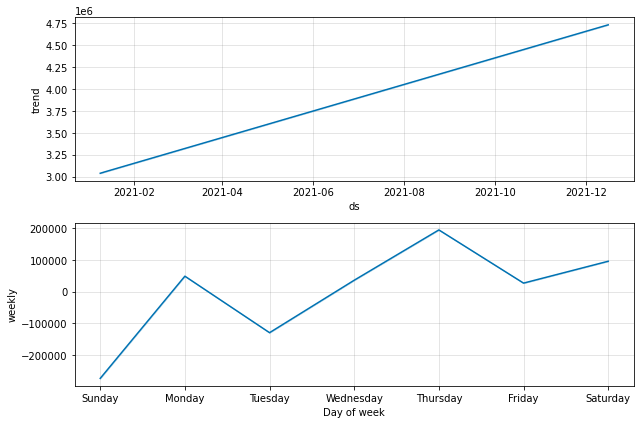

In [54]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)
plt.ticklabel_format(style='plain', axis='y')

In [55]:
df.head()

,ds,y
0,2021-01-09,1653794
1,2021-02-09,2373894
2,2021-03-09,2415128
3,2021-04-09,2299748
4,2021-05-09,177030


In [56]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='120 days', period='60 days', horizon = '60 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-06-18 00:00:00 and 2021-10-16 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-07-09,2.744391e+06,1.042064e+06,4.409750e+06,3966728,2021-06-18
1,2021-07-10,3.493068e+06,1.760126e+06,5.099141e+06,4524241,2021-06-18
2,2021-07-11,3.567039e+06,1.949636e+06,5.261233e+06,4073233,2021-06-18
3,2021-07-12,4.908216e+06,3.053355e+06,6.673949e+06,4877172,2021-06-18
4,2021-08-09,4.947996e+06,3.442214e+06,6.726580e+06,4215316,2021-06-18


In [57]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,8 days,7.909490e+11,889353.137165,742961.662178,0.153332,0.135923,0.875
1,9 days,7.430674e+11,862013.568376,680049.843729,0.138834,0.109919,0.875
2,10 days,7.520079e+11,867183.869708,689645.999282,0.141295,0.119761,0.875
3,11 days,7.985549e+11,893618.974213,730633.804949,0.149243,0.141326,0.875
4,12 days,7.659534e+11,875187.644211,705631.345765,0.143050,0.119761,0.875


In [58]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,8 days,7.909490e+11,889353.137165,742961.662178,0.153332,0.135923,0.875
1,9 days,7.430674e+11,862013.568376,680049.843729,0.138834,0.109919,0.875
2,10 days,7.520079e+11,867183.869708,689645.999282,0.141295,0.119761,0.875
3,11 days,7.985549e+11,893618.974213,730633.804949,0.149243,0.141326,0.875
4,12 days,7.659534e+11,875187.644211,705631.345765,0.143050,0.119761,0.875


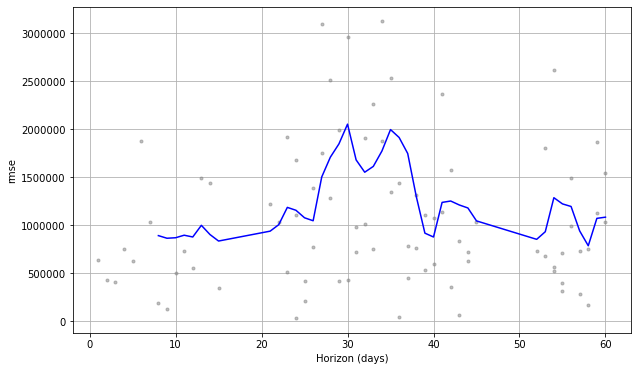

In [59]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.ticklabel_format(style='plain', axis='y')